# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
# Your work here.

#First, we import the data.
df = pd.read_csv(r'C:\Users\songs\Desktop\Springboard Files\Human Body temperature Mini Project\human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.shape

(130, 3)

**Question 1: Is the distribution of body temperatures normal?** 

There are a few ways to test a sample's normalcy:

*1.Compile a normal distribution using np.random.normal with the mean and standard deviation of the data and compare the shape and ECDF of the data with that of the simulated normal distribution.*

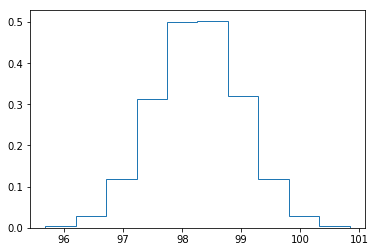

In [6]:
# Create a normal distribution using the mean and standard deviation of the temperature.

temperature = df['temperature']

norm_dist = np.random.normal(temperature.mean(),temperature.std(), size=10000)
plt.hist(norm_dist, density = True, histtype = 'step')
plt.show()

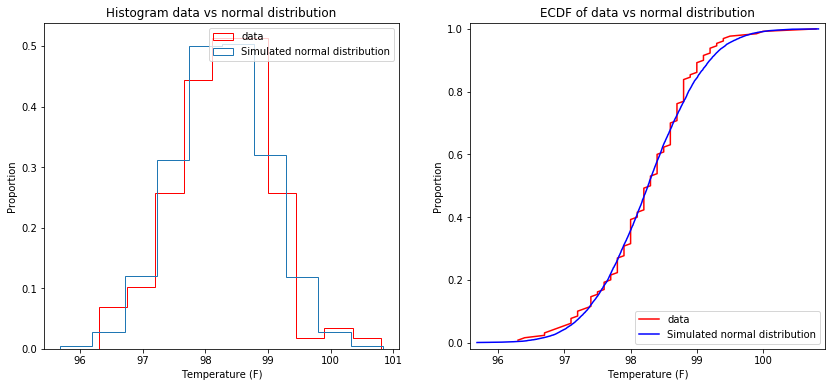

In [7]:
# Compare with our data.

#Setting figure size
plt.figure(figsize = (14, 6))

#Histograms
plt.subplot(1,2,1)
plt.hist(temperature, density = True, histtype = 'step', color = 'r', label = 'data')
plt.hist(norm_dist, density = True, histtype = 'step', label = 'Simulated normal distribution')
plt.title('Histogram data vs normal distribution')
plt.xlabel('Temperature (F)')
plt.ylabel('Proportion')
plt.legend(loc = 'upper right')

#ECDF
def ecdf(x_col, lab = None, shade = 'b', al = 1):
    x = np.sort(x_col)
    y = np.arange(1, len(x) + 1)/len(x)
    plt.plot(x, y, color = shade, label = lab, alpha = al)
    plt.margins(0.02)

#Plotting ECDF
plt.subplot(1,2,2)
ecdf(temperature, shade = 'r', lab = 'data')
ecdf(norm_dist, lab = 'Simulated normal distribution')
plt.title('ECDF of data vs normal distribution')
plt.xlabel('Temperature (F)')
plt.ylabel('Proportion')
plt.legend(loc = 'lower right')
plt.show()

The two histograms and ECDFs look pretty similar, so I would say that our data is normally distributed.

*2.Compare the median relative to the mean, calculate the percentage of points that fell within one, two, and three standard deviations of the mean, and see if the results agree with those of a normal distribution.*

In a normal distribution, the mean is approximately equal to the median. Also, around 68% of the data points should fall within 1 standard deviation of the mean, 95% should fall within 2 standard deviations of the mean, and 99.7% should fall within 3 standard deviations of the mean.

In [8]:
# In a normal distribution, the mean should be close to the median. Is this true?
med = np.median(temperature)
mean = np.mean(temperature)

print("Mean of data is " + str(mean) + ", and Median of data is " + str(med))

Mean of data is 98.24923076923078, and Median of data is 98.3


The two appears to be pretty close, so I think that satisfies our requirement.

In [9]:
# In a normal distribution, 68% is within 1 std, 95% is within 2 stds, and 99.7% is within 3 stds. Is this true?

def percentage_within(stds):
    upper = temperature.mean() + stds * temperature.std()
    lower = temperature.mean() - stds * temperature.std()
    selector = temperature[(temperature < upper) & (temperature > lower)]
    percent = np.sum(selector)/len(temperature)
    return percent

print(str(percentage_within(1)) + "% of the data is within 1 standard deviation. " 
      + str(percentage_within(2)) + "% of the data is within 2 standard deviations. "
      + str(percentage_within(3)) + "% of the data is within 3 standard deviations.")

68.0453846153846% of the data is within 1 standard deviation. 92.96615384615384% of the data is within 2 standard deviations. 97.47384615384614% of the data is within 3 standard deviations.


Although there are slightly less data contained in 2 and 3 standard deviations from the mean, I would say that the results are close enough to what we expect, making our data normal.

**Question 2: Is the sample size large? Are the observations independent?**

For a sample to be large enough, n should be greater than 30. 

Even though it was not explicitly stated in the problem, we can assume that the temperatures were independent since 1) one person's body temperature had nothing to do with that of another's, and 2) even though we're sampling without replacement, the sample size was less than 10% of the population.

**Question 3: Is the true population mean really 98.6 degrees F?**

*1. First, try a bootstrap hypothesis test.*


In [10]:
# Shift the temperature data so that its mean is 98.6 degrees. 
shifted_temps = temperature - mean + 98.6

# Write a function to calculate a sample's difference from 98.6 degrees.
def difference(data):
    return np.mean(data) - 98.6

# Calculate how different our sample is from 98.6.
diff_obs = difference(temperature)

# Calculate bootstrap replicates
def draw_bs_reps(data, func, size = 10000):
    array = np.empty(size)
    for i in range(size):
        bs_samps = np.random.choice(data, size = len(data))
        array[i] = func(bs_samps)
    return array

bs_reps = draw_bs_reps(shifted_temps, difference)

#Calculate the p-value.
p_value = np.sum(bs_reps <= diff_obs)/10000
print("P-value is: " + str(p_value))

P-value is: 0.0


*2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?*
> I would utilize a one-sample test because we are comparing the mean of one sample to a known value.

In [11]:
H0 = "The true mean of the population is, according to our sample, not significantly different from 98.6 degrees."
H1 = "The true mean of the population is, according to our sample, significantly different from 98.6 degrees."

alpha = 0.05

z_score = (mean - 98.6) / (np.std(temperature)/np.sqrt(len(temperature)))
p_value = 2 * (st.norm.cdf(z_score))
print("P-value is: " + str(p_value))
if p_value < alpha:
    print(H1)
else:
    print(H0)

P-value is: 4.3523151658821886e-08
The true mean of the population is, according to our sample, significantly different from 98.6 degrees.


*3. In this situation, is it appropriate to use the t or z statistic?*
> Since our sample size is above 30, I would use the z statistic. Technically, since our population standard deviation is unknown we should use the t-statistic, but when sample size is above 30 the two distributions are practically the same.

*4. Now try using the other test. How is the result be different? Why?*
> When we approximate the population standard deviation using the sample standard deviation in a t-statistic, we tend to overestimate the 95% confidence interval and increase our type II error. 

In [12]:
t_score = (mean - 98.6) / (np.std(temperature)/np.sqrt(len(temperature)))
p_value = st.t.sf(np.abs(t_score), len(temperature)-1)*2 
print("P-value is: " + str(p_value))

P-value is: 2.1887464624095175e-07


**Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.**

*1. Which one is the correct one to use?*
> Since our sample size is below 30, I would uze the t-statistic.

*2. What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?*
>When we approximate the population standard deviation using the sample standard deviation in a z-statistic, we tend to underestimate the 95% confidence interval and increase our type I error.

In [13]:
sample = temperature.sample(10)

#Z-test:
H0 = "The true mean of the population is, according to our sample, not significantly different 98.6 degrees."
H1 = "The true mean of the population is, according to our sample, significantly different from 98.6 degrees."

alpha = 0.05

z_score = (sample.mean() - 98.6) / (sample.std()/np.sqrt(10))
p_value = 2 * (st.norm.cdf(z_score))
print("P-value is: " + str(p_value))
if p_value < alpha:
    print(H1)
else:
    print(H0)

P-value is: 0.00011669474424797447
The true mean of the population is, according to our sample, significantly different from 98.6 degrees.


In [14]:
#T-test:
t_score = (sample.mean() - 98.6) / (sample.std()/np.sqrt(10))
p_value = st.t.sf(np.abs(t_score), 9) * 2 
print("P-value is: " + str(p_value))
if p_value < alpha:
    print(H1)
else:
    print(H0)

P-value is: 0.003888631559618885
The true mean of the population is, according to our sample, significantly different from 98.6 degrees.


**Question 5: At what temperature should we consider someone's temperature to be "abnormal"?**

I would say that a person's temperature is abnormal when it falls out of the 95% Confidence interval of the mean body temperature.

*1. As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.*


*2. Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.*

In [15]:
# Frequentist approach:
n = len(temperature)
se = temperature.std()/np.sqrt(n)
moe = se * st.t.ppf(0.95, n-1)

ci_lower, ci_higher = (mean - moe, mean + moe)
print(ci_lower, ci_higher)

98.1426943241349 98.35576721432666


In [16]:
# Bootstrap approach:
bs_replicates = draw_bs_reps(temperature, np.mean, size = 10000)
ci_lower, ci_higher = np.percentile(bs_replicates, 2.5), np.percentile(bs_replicates, 97.5)
print(ci_lower, ci_higher)

98.1246153846154 98.37615384615384


**Question 6: Is there a significant difference between males and females in normal temperature?**



*1. What testing approach did you use and why?*

>I used a two sample approach because this time, we are comparing the mean of two difference samples. First, I permutated the temperature data and compared the result to actual male and female temperatures. This gave us a qualitative look at the difference between the data. Then, for a more quantitative analysis, I used a bootstrap approach to generate a p-value.

In [17]:
#Splitting the data into male and female
female = df[df['gender'] == 'F']['temperature']
male = df[df['gender'] == 'M']['temperature']


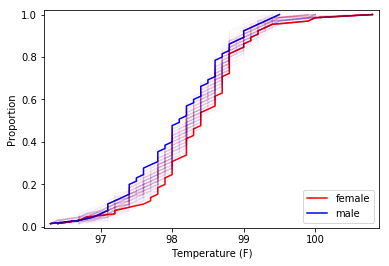

In [18]:
#ECDF
ecdf(female, shade = 'r', lab = 'female')
ecdf(male, lab = 'male')
#Generatin replicates of the data
for i in range(100):
    perm = np.random.permutation(temperature)
    female_perm = perm[:len(female)]
    male_perm = perm[len(female):]
    ecdf(female_perm, shade = 'r', al=0.01)
    ecdf(male_perm, shade = 'b', al=0.01)
plt.xlabel('Temperature (F)')
plt.ylabel('Proportion')
plt.legend(loc = 'lower right')
plt.show()

Judging from how the original ECDFs are touching the permutated bootstrap replicates, this might be very close and not obvious to tell graphically. To get a p-value, I generated bootstrap replicates of the difference between the two genders and looked at what is the probably that we could get a result as extreme as the one we have.

In [20]:
#Bootstrap

# Shift the temperature data so that its mean is 98.6 degrees. 
shifted_male = male - np.mean(male) + np.mean(female)

# Write a function to calculate a sample's difference from 98.6 degrees.
def diff_from_f(data):
    return np.mean(data) - np.mean(female)
                            
# Calculate how different our sample is from 98.6.
diff_obs = np.mean(male) - np.mean(female)

# Calculate bootstrap replicates
bs_reps = draw_bs_reps(shifted_male, diff_from_f, 10000)

#Null and alternate hypothesis
H0 = "Male and female body temperatures are not significantly different."
H1 = "Female body temperature is significantly higher than male body temperature."
alpha = 0.05
#Calculate the p-value.
p_value = np.sum(bs_reps <= diff_obs)/10000
print(p_value)
if p_value < alpha:
    print(H1)
else:
    print(H0)

0.0009
Female body temperature is significantly higher than male body temperature.


*2. Write a story with your conclusion in the context of the original problem.*

In the data, the mean of the females' body temperature is 98.39 degrees Fahrenheit, and the mean of the males' body temperature is 98.10 degrees Fahrenheit. The .29 degrees difference might suggest that females have a higher body temperature, but there's a probability that this difference is caused by mere chance. To determine whether the 65 male and 65 female participants included in the data had significantly different body temperatures, I compared the temperatures using two different methods and reached the same conclusion **that the males' and females' body temperatures are significantly different with alpha = 0.05**.

In the first method, I shuffled the data, randomly re-assigned each entry to "male" and "female" labels, and compared the results to the original male and female temperature data to see whether the difference can be accounted to chance. I plotted 100 of these generated data on the same plot as the original male and female temperature data, and as you can see, the original data seems to be on the outer edge of the generated data, making it difficult to reach a conclusion with the graphical method.

To further investigate the difference, I shifted the male temperature data so that both genders have the same mean body temperature, and using this shifted male data, generated 10000 more samples. I took the mean of each sample and compared it with the female sample to see what are the chances that I could get a 0.29 degree difference when both mean temperatures are actually equal. I got a p-value of 0.009, which is lower than 0.05 and means that there is a little less than a 1% chance that we could get the difference when the mean body temperature of the male and female populations are equal. 

This analysis would suggest that male and female body temperatures are different. However, it is entirely possible that the male and female body temperatures are actually  not different and we have a type I error. To decrease this error, perhaps we need more samples to increase the power or a smaller p-value. 